This notebook shows the code used to create Figures 2,3,7 and 8. 

**In all the analyses below, we use the data of cases, hospitalizations and tests reported up `2022-06-30`.** 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

Getting the data of cases of covid-19 by canton in Switzerland: 

In [2]:
cases = pd.read_csv('data_article/cases_swiss.csv', usecols=['georegion','datum','entries'])
cases.datum = pd.to_datetime(cases.datum)
cases.sort_values(by = ['georegion', 'datum'], inplace = True)
cases.set_index('datum', inplace = True)
cases

,georegion,entries
datum,,
2020-02-24,AG,0
2020-02-25,AG,1
2020-02-26,AG,0
2020-02-27,AG,0
2020-02-28,AG,0
...,...,...
2022-06-26,ZH,582
2022-06-27,ZH,1750
2022-06-28,ZH,1602


Getting the data of hospitalizations of covid-19 by canton in Switzerland: 

In [3]:
hosp = pd.read_csv('data_article/hosp_swiss.csv', usecols=['georegion','datum','entries'])
hosp.datum = pd.to_datetime(hosp.datum)
hosp.sort_values(by = ['georegion', 'datum'], inplace = True)
hosp.set_index('datum', inplace = True)
hosp

,georegion,entries
datum,,
2020-02-24,AG,0
2020-02-25,AG,1
2020-02-26,AG,0
2020-02-27,AG,0
2020-02-28,AG,0
...,...,...
2022-06-26,ZH,8
2022-06-27,ZH,8
2022-06-28,ZH,8


Plotting the Figure 2: Scatter plot of hospitalizations vs cases for all cantons 

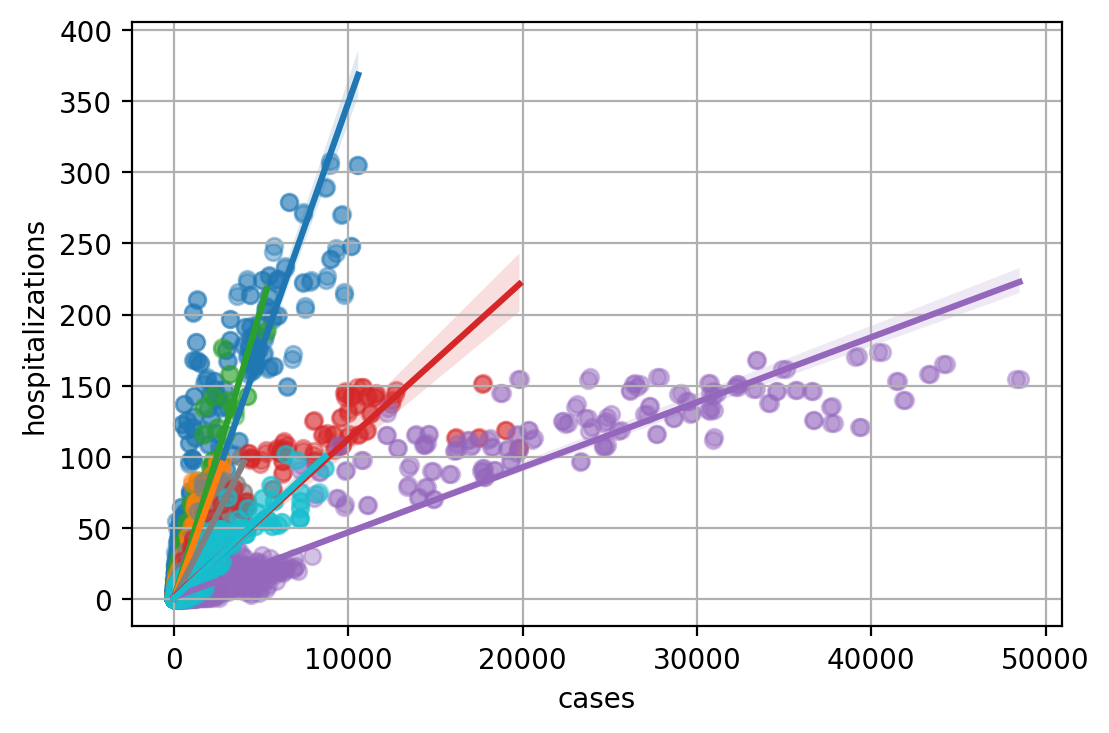

In [4]:
fig, ax = plt.subplots(dpi = 200)
sns.regplot(x=cases[:'2020-12-31'].entries, y=hosp[:'2020-12-31'].entries,  
            label = '2020', color = 'tab:blue', ax=ax, scatter_kws={'alpha':0.4} )

sns.regplot(x=cases['2021-01-01':'2021-03-31'].entries,y=hosp['2021-01-01':'2021-03-31'].entries,  
            label = '2021-Q1', color = 'tab:green', ax=ax, scatter_kws={'alpha':0.4} )

sns.regplot(x=cases['2021-04-01':'2021-06-30'].entries,y=hosp['2021-04-01':'2021-06-30'].entries,  
            label = '2021-Q2', color = 'tab:orange', ax=ax, scatter_kws={'alpha':0.4} )
sns.regplot(x=cases['2021-07-01':'2021-09-30'].entries,y=hosp['2021-07-01':'2021-09-30'].entries,  
            label = '2021-Q3', color = 'tab:gray', ax=ax, scatter_kws={'alpha':0.4} )
sns.regplot(x=cases['2021-10-01':'2021-12-31'].entries,y=hosp['2021-10-01':'2021-12-31'].entries,  
            label = '2021-Q4', color = 'tab:red', ax=ax, scatter_kws={'alpha':0.4} )
sns.regplot(x=cases['2022-01-01':'2022-03-31'].entries,y=hosp['2022-01-01':'2022-03-31'].entries,  
            label = '2022-Q1', color = 'tab:purple', ax=ax, scatter_kws={'alpha':0.4} )
sns.regplot(x=cases['2022-04-01':'2022-06-30'].entries,y=hosp['2022-04-01':'2022-06-30'].entries,  
            label = '2022-Q2', color = 'tab:cyan', ax=ax, scatter_kws={'alpha':0.4} )
ax.set_ylabel('hospitalizations')
ax.set_xlabel('cases')

#ax.set_title('Cases vs. hospitalizations in Switzerland')
#ax.legend(); # to remove the legend of the plot 
plt.grid()
plt.savefig('plots/cases_hosps.png', dpi=300)
plt.show()

Plotting the Figure 3: Scatter plot of hospitalizations vs cases for the cantons ZH, GE, AG, BE:

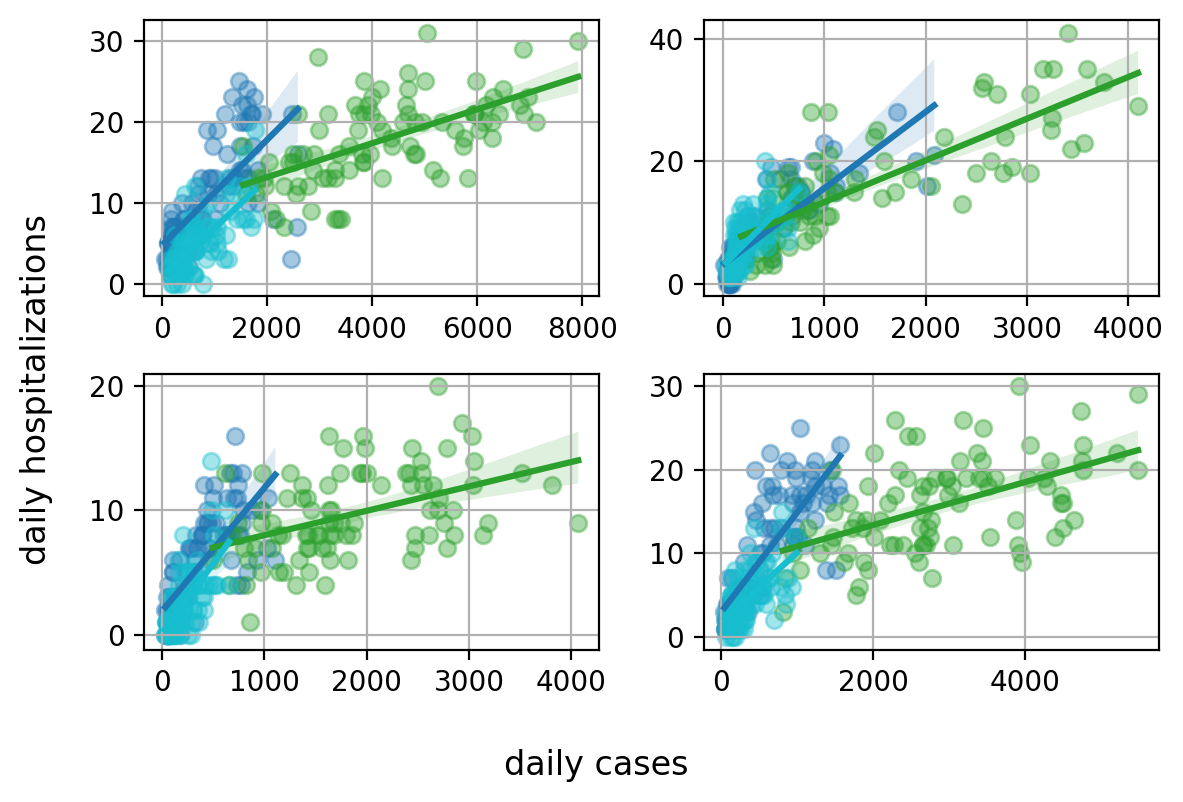

In [5]:
def plot_cvsh(cases, hosp, cantons=['ZH','GE','AG','BE']):
    fig, axes = plt.subplots(2,2,dpi = 200, sharey=False, sharex=False)
    for canton,ax in zip(cantons,axes.ravel()):  
        sns.regplot(x=cases[cases.georegion==canton]['2021-10-01':'2021-12-31'].entries, 
                    y=hosp[hosp.georegion==canton]['2021-10-01':'2021-12-31'].entries,  
                    label = '2021-Q4', color = 'tab:blue', ax=ax, scatter_kws={'alpha':0.4}  )

        sns.regplot(x=cases[cases.georegion==canton]['2022-01-01':'2022-03-31'].entries,
                    y=hosp[hosp.georegion==canton]['2022-01-01':'2022-03-31'].entries,  
                    label = '2022 - Q1', color = 'tab:green', ax=ax, scatter_kws={'alpha':0.4}  )

        sns.regplot(x=cases[cases.georegion==canton]['2022-04-01':'2022-06-30'].entries,
                    y=hosp[hosp.georegion==canton]['2022-04-01':'2022-06-30'].entries,  
                    label = '2022 - Q2', color = 'tab:cyan', ax=ax, scatter_kws={'alpha':0.4}  )

        #ax.set_title(canton)
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.grid()

    # ax.set_title('Cases vs. hospitalizations in Geneva')
    fig.supxlabel('daily cases')
    fig.supylabel('daily hospitalizations')
    #ax.legend(fontsize='x-small');
    fig.tight_layout()
    plt.savefig(f'plots/cases_hosps_{"-".join(cantons)}.png', dpi=300)
    
plot_cvsh(cases, hosp)

## Bayesian Inference

In [6]:
from epistats import *

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Getting the data of tests of covid-19 by canton in Switzerland: 
* `entries`: Total number of covid-19 tests performed by day. 
* `entries_pos`: Number of positive covid-19 tests performed by day. 
* `entries_neg`: Number of negative covid-19 tests performed by day. 

In [7]:
tests = pd.read_csv('data_article/tests_swiss.csv', usecols=['georegion','datum','entries', 'entries_pos', 'entries_neg'])
tests.datum = pd.to_datetime(tests.datum)
tests.sort_values(by = ['georegion', 'datum'], inplace = True)
tests.set_index('datum', inplace = True)
tests

,georegion,entries,entries_pos,entries_neg
datum,,,,
2020-02-24,AG,NaN,NaN,NaN
2020-02-25,AG,NaN,NaN,NaN
2020-02-26,AG,NaN,NaN,NaN
2020-02-27,AG,NaN,NaN,NaN
2020-02-28,AG,NaN,NaN,NaN
...,...,...,...,...
2022-06-26,ZH,1255.0,719.0,536.0
2022-06-27,ZH,3060.0,1676.0,1384.0
2022-06-28,ZH,3442.0,1867.0,1575.0


Creating a dataset with the number of cases, hospitalizations, tests and positive tests by day in **GE** between `2021-01-01` and `2022-06-30`:

In [8]:
df_inf = pd.DataFrame()
ini_date = '2021-01-01'
canton = 'GE'
#end_date = 
df_inf['cases'] = cases.loc[cases.georegion == canton][ini_date:]['entries']
df_inf['hospitalizations'] = hosp.loc[hosp.georegion == canton][ini_date:]['entries']
df_inf['tests'] = tests.loc[tests.georegion == canton][ini_date:]['entries']
df_inf['tests_pos'] = tests.loc[tests.georegion == canton][ini_date:]['entries_pos']
df_inf = df_inf[:'2022-05-30'] 

df_inf

,cases,hospitalizations,tests,tests_pos
datum,,,,
2021-01-01,65,6,582.0,67.0
2021-01-02,127,4,1179.0,126.0
2021-01-03,76,5,663.0,75.0
2021-01-04,153,5,1962.0,157.0
2021-01-05,163,2,2156.0,177.0
...,...,...,...,...
2022-05-26,43,2,430.0,55.0
2022-05-27,114,3,750.0,121.0
2022-05-28,57,1,518.0,88.0


Computing the estimated prevalence of covid-19 and estimated probability of being hospitalized: 

In [9]:
tracevb = inf_pos_prob_cases_hosp(df_inf)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [phosp, prevalence]
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 32 seconds.


Plotting the Figure 7: The estimated prevalence of covid-19 cases as a fraction of the exposed population. 

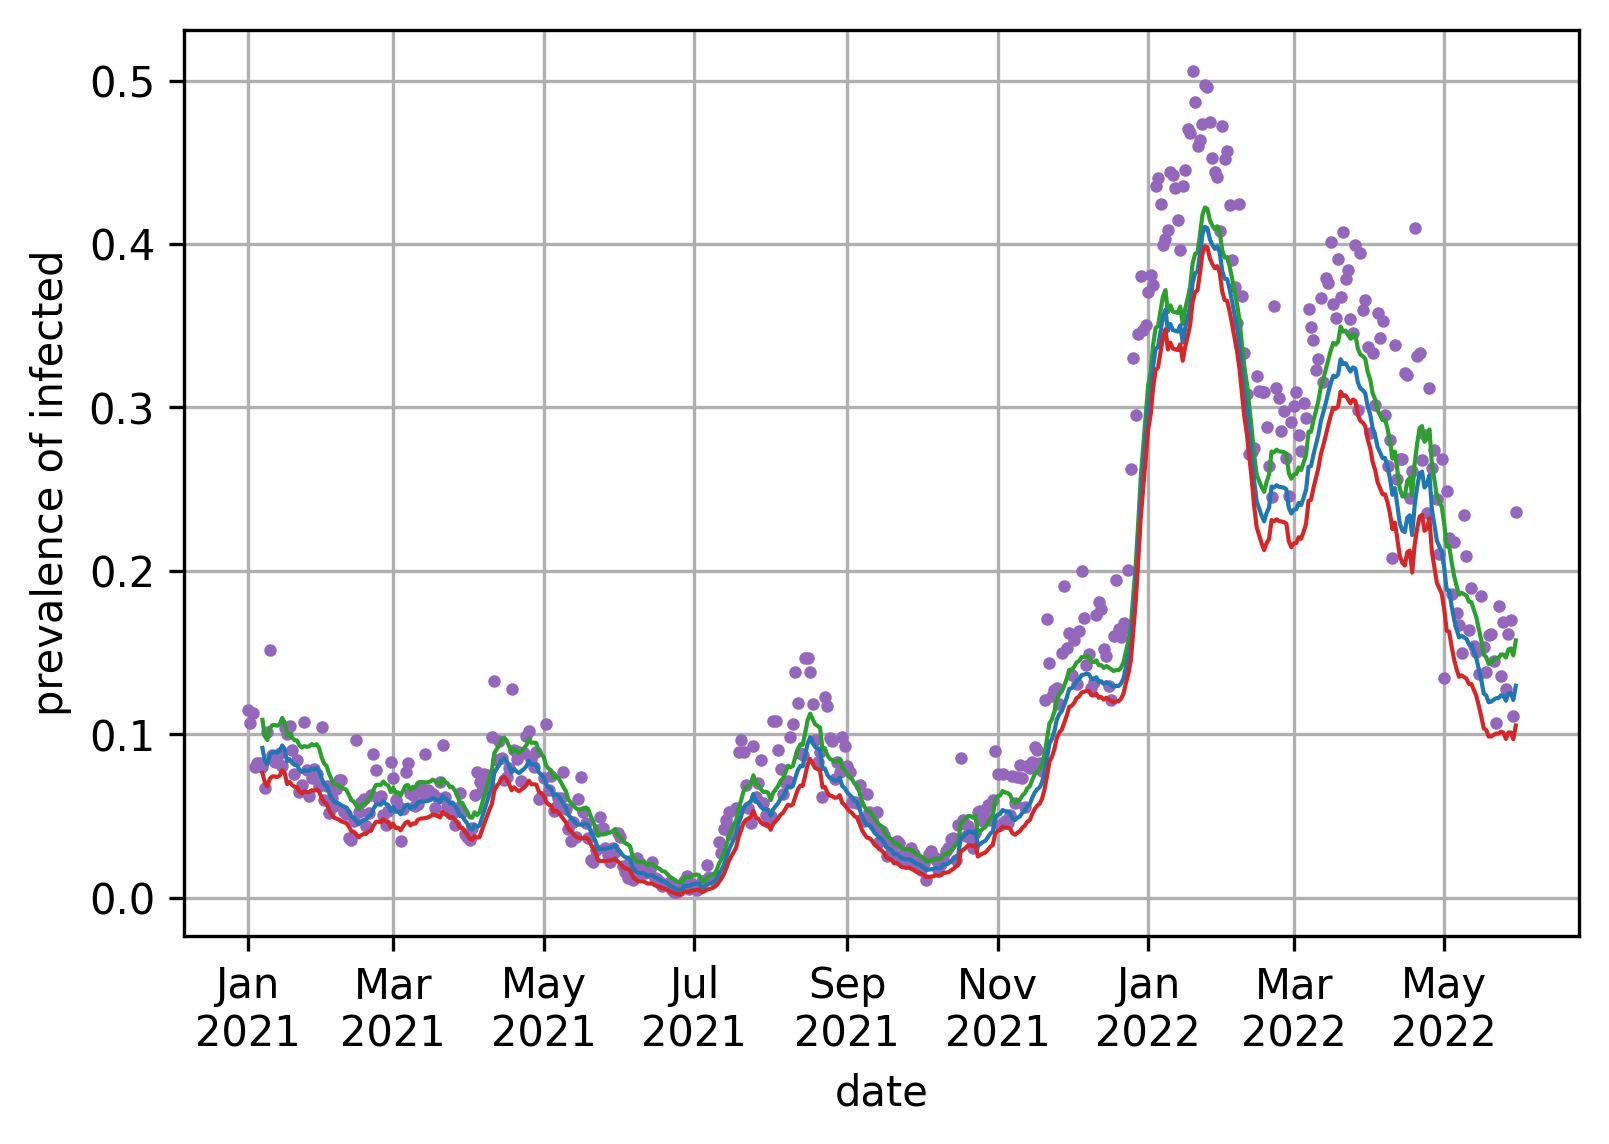

In [10]:
plot_pos_prob_prev_plt(df_inf, tracevb)

Plotting the Figure 8: The posterior probability distribution for the probability of hospitalization in GE

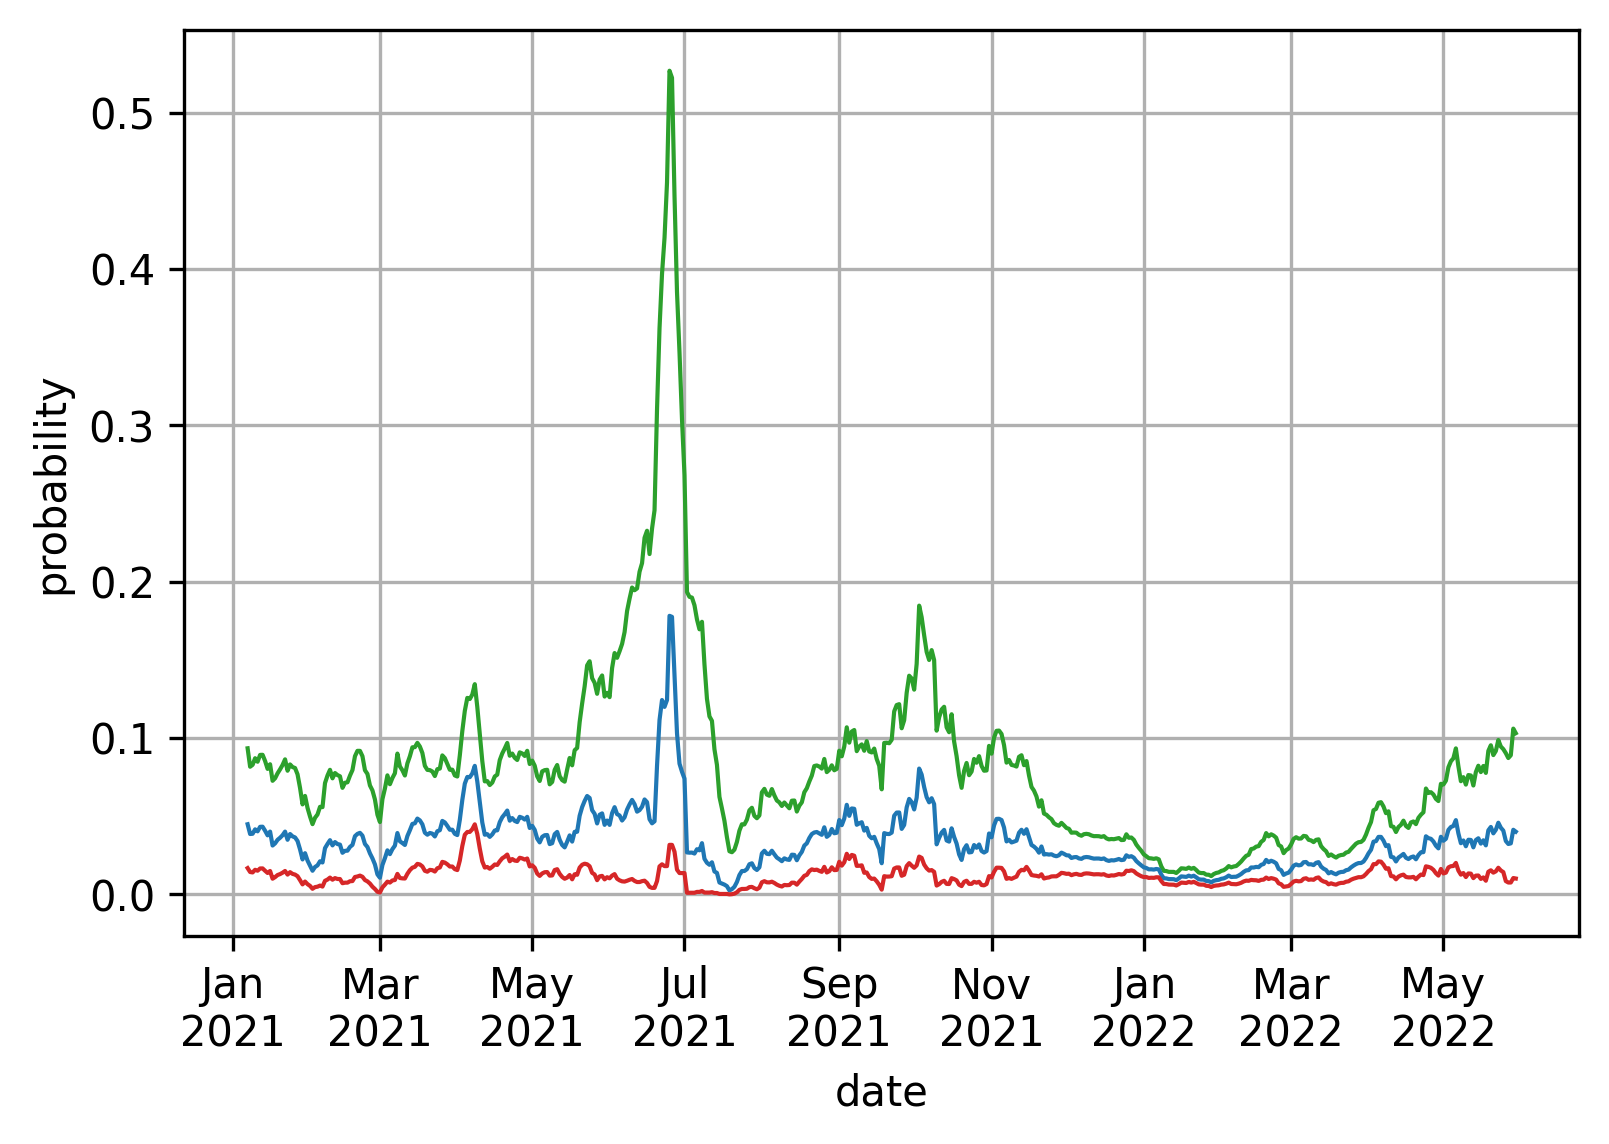

In [12]:
plot_pos_prob_hosp_plt(
    df_inf,
    tracevb)